# Statistics: MonteCarlo Methods
26 January 2020


Author: Laura V. Trujillo T 

e-mail: [lvtrujillot@unal.edu.co](lvtrujillot@unal.edu.co)



## 1. Metropolis for hard disks
_Two disks of radius **R** in a square box of side **L** which each walker is made of 4 coordinates. Start with several walkers and iterate checking the convergence of quantities such as the distance between them. Repeat for disks in a sphere of radius **L**_


In [230]:
#Parameters
N <- 1000
L <- 1
R <- 0.2

#Function distance
d <- function(x1, x2, y1, y2){
    X <- (x2 - x1)^2
    Y <- (y2 - y1)^2
    return(sqrt(X + Y))
}

In [274]:
#Walkers
delta_x <- runif(N, 0, 0.2 * L)
delta_y <- runif(N, 0, 0.2 * L)
r0 <- runif(N, 0,  0.8 * L) 
rp0 <- runif(N, 0, 0.8 * L)

#Inital positions 
x0 <- ifelse(r0 < L, r0 + delta_x, r0) #This always be true since r0, rp0 max value is 0.8. 
y0 <-  ifelse(r0 < L, r0 + delta_y, r0)

xp0 <-  ifelse(r0 < L, rp0  + delta_x, rp0)
yp0 <-  ifelse(r0 < L , rp0 + delta_y, rp0)

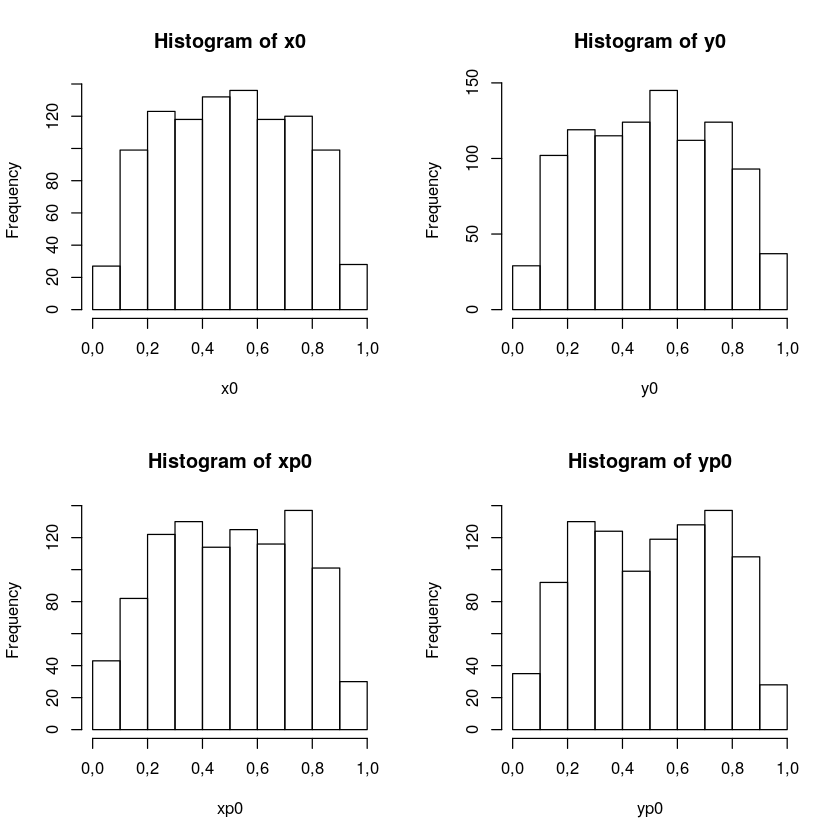

In [276]:
par(mfrow=c(2,2))
hist(x0)
hist(y0)
hist(xp0)
hist(yp0)

In [277]:
# Disks' new positions
d0 <- d(x0, xp0, y0, yp0)

x1 <-  ifelse(d0 > (2 * R) & x0 < L, x0+ delta_x, x0)
y1 <-  ifelse(d0 > (2 * R) & y0 < L , y0+ delta_y, y0)

x2 <-  ifelse(d0 > (2 * R)  & xp0 < L  , xp0+ delta_x, xp0)
y2 <-  ifelse(d0 > (2 * R)  & yp0 < L  , yp0+ delta_y, yp0)

In [279]:
# accepted positions
d1 <- d(x1, x2, y1, y2)

new_x1 <- ifelse(x1 < L & d1 > (2 * R), x1, x0)
new_y1 <- ifelse(y1 < L & d1 > (2 * R), y1, y0)

new_x2 <- ifelse(x2 < L & d1 > (2 * R), x2, xp0)
new_y2 <- ifelse(y2 < L & d1 > (2 * R), y2, yp0)

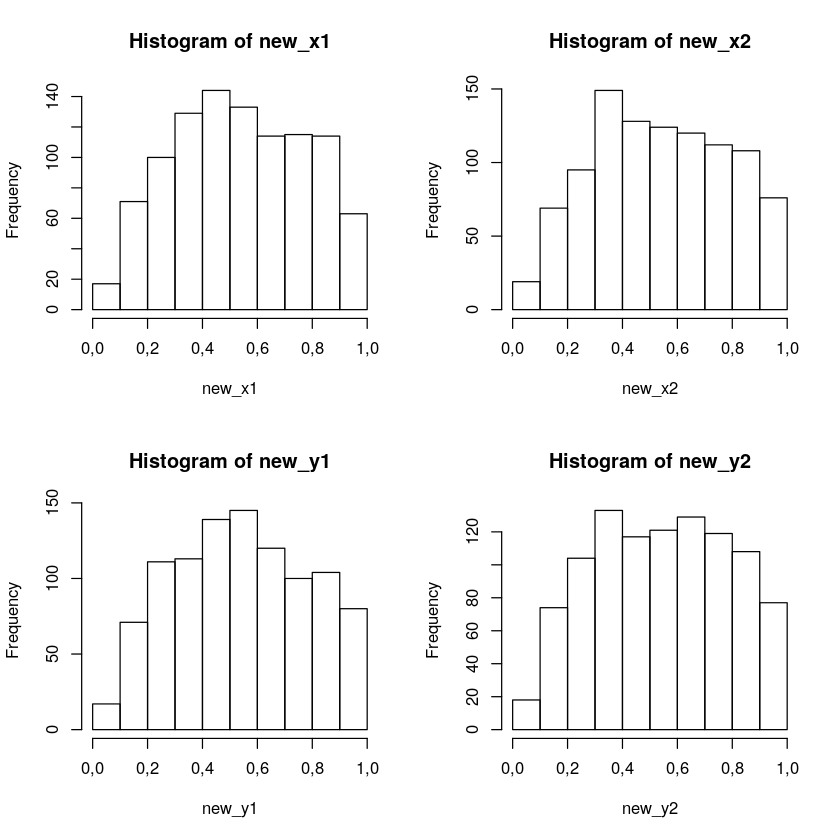

In [280]:
par(mfrow=c(2,2))
hist(new_x1)
hist(new_x2)
hist(new_y1)
hist(new_y2)

In [281]:
df <- d(new_x1, new_x2, new_y1, new_y2)

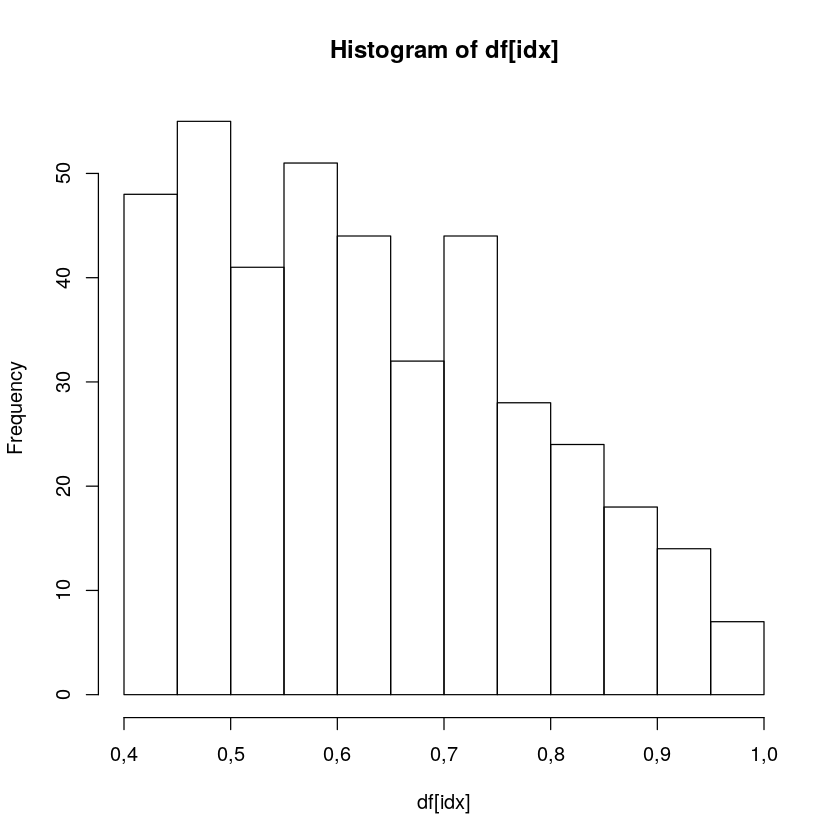

In [282]:
idx <- which(df > (2 * R) & df <= L)
hist(df[idx])

#### If the disks were in a circle of radius **L**

In [291]:
condition <- function(x, y, R){
    return(x^2 + y^2 < R^2)
}

cx1 <-  ifelse(d0 > (2 * R) & condition(x0,y0,L), x0+ delta_x, x0)
cy1 <-  ifelse(d0 > (2 * R) & condition(x0,y0,L), y0+ delta_y, y0)

cx2 <-  ifelse(d0 > (2 * R)  & condition(xp0,yp0, L), xp0+ delta_x, xp0)
cy2 <-  ifelse(d0 > (2 * R)  & condition(xp0,yp0, L), yp0+ delta_y, yp0)

In [292]:
# accepted positions
dc1 <- d(cx1, cx2, cy1, cy2)

new_cx1 <- ifelse(condition(cx1,cy1,L) & dc1 > (2 * R), cx1, x0)
new_cy1 <- ifelse(condition(cx1,cy1, L) & dc1 > (2 * R), cy1, y0)

new_cx2 <- ifelse(condition(cx2,cy2,L) & dc1 > (2 * R), cx2, xp0)
new_cy2 <- ifelse(condition(cx2,cy2,L) & dc1 > (2 * R), cy2, yp0)

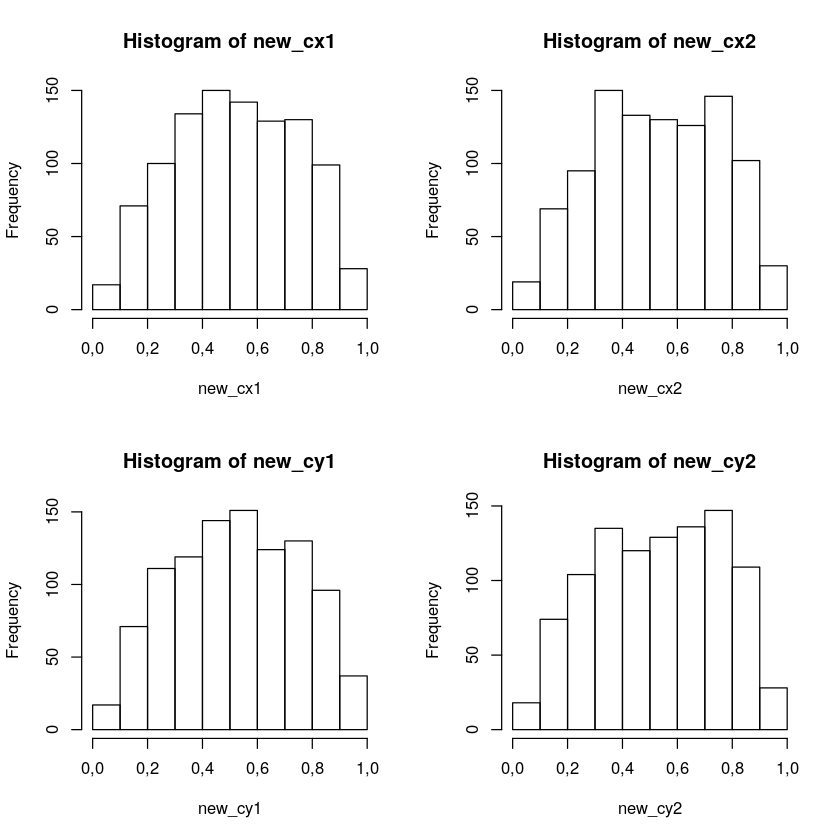

In [293]:
par(mfrow=c(2,2))
hist(new_cx1)
hist(new_cx2)
hist(new_cy1)
hist(new_cy2)

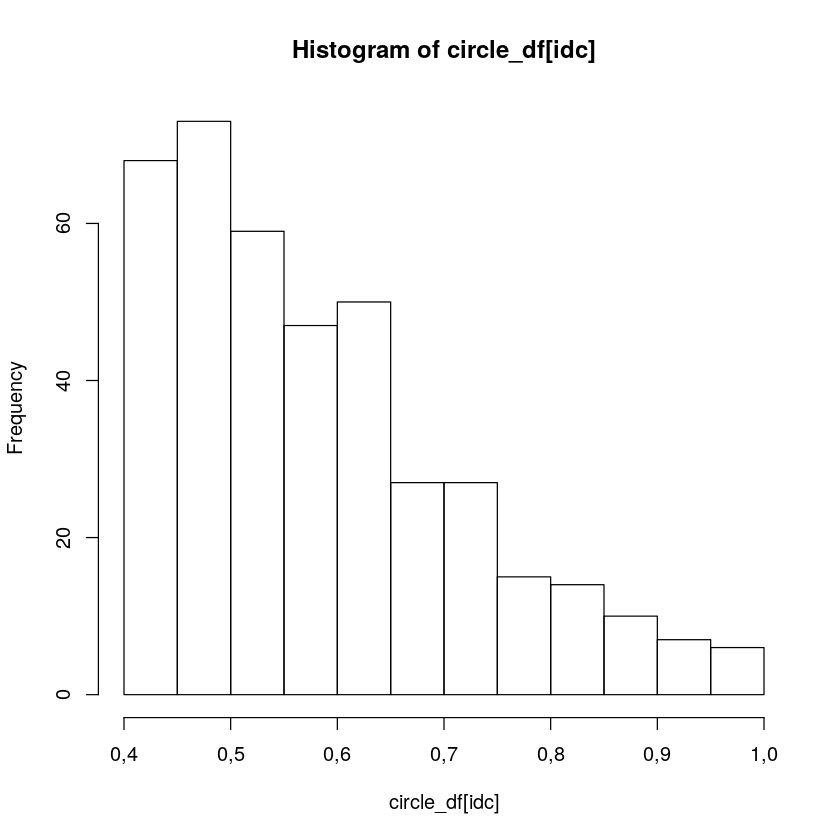

In [295]:
circle_df <- d(new_cx1, new_cx2, new_cy1, new_cy2)
idc <- which(circle_df > (2 * R) & circle_df <= L)
hist(circle_df[idc])